In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [315]:
df_apple = pd.read_csv('applemobilitytrends-2020-11-14.csv', low_memory=False) 
region = pd.read_csv('subregions_Apple_to_Google.csv', low_memory=False, index_col=0)
df_google = pd.read_csv('google_clean copie.csv', sep='\t') 
merge = pd.read_csv('summary_report_regions.csv', low_memory=False) 

In [316]:
merge_france = merge[merge['country'] == 'France']
merge_france_null = merge_france.isnull().sum()
merge_france['region'].value_counts()
Occitanie = merge_france[merge_france['region'] == 'Occitanie'] 
Occitanie.isnull().sum()

country                    0
region                     0
date                       0
retail and recreation      0
grocery and pharmacy       0
parks                      0
transit stations           0
workplaces                 0
residential                0
driving                  172
transit                  172
walking                  172
dtype: int64

In [317]:
merge_france.head() 

,country,region,date,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,transit,walking
89380,France,Alsace Region,2020-01-13,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN
89381,France,Alsace Region,2020-01-14,NaN,NaN,NaN,NaN,NaN,NaN,0.48,NaN,NaN
89382,France,Alsace Region,2020-01-15,NaN,NaN,NaN,NaN,NaN,NaN,7.45,NaN,NaN
89383,France,Alsace Region,2020-01-16,NaN,NaN,NaN,NaN,NaN,NaN,2.21,NaN,NaN
89384,France,Alsace Region,2020-01-17,NaN,NaN,NaN,NaN,NaN,NaN,9.56,NaN,NaN


In [318]:
df_google.head()

,date,Date,Province,Retail_and_Recreation,Grocery_and_Pharmacy,Parks,Transit_Stations,Workplaces,Residences
0,2020-02-15,2020-02-15,France (General),-2.0,-1.0,23.0,12.0,-2.0,-1.0
1,2020-02-16,2020-02-16,France (General),6.0,2.0,9.0,7.0,-1.0,-1.0
2,2020-02-17,2020-02-17,France (General),1.0,2.0,16.0,-6.0,-15.0,4.0
3,2020-02-18,2020-02-18,France (General),5.0,2.0,36.0,-4.0,-14.0,3.0
4,2020-02-19,2020-02-19,France (General),-4.0,-3.0,18.0,-6.0,-12.0,2.0


In [319]:
France = df_apple[df_apple['country'] == 'France']
France.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-14
244,city,Bordeaux,driving,NaN,Aquitaine Region,France,100.0,105.50,111.96,113.36,...,67.04,62.87,46.91,46.05,67.84,65.59,52.85,68.71,64.72,50.51
245,city,Bordeaux,transit,NaN,Aquitaine Region,France,100.0,95.19,102.90,103.64,...,152.86,149.09,105.94,126.86,151.78,143.98,124.13,151.00,150.74,116.77
246,city,Bordeaux,walking,NaN,Aquitaine Region,France,100.0,112.15,119.79,134.03,...,56.21,54.78,45.39,46.53,57.02,56.96,47.70,57.36,58.09,53.05
420,city,Grenoble,driving,NaN,Rhône-Alpes Region,France,100.0,105.45,110.14,118.24,...,63.09,64.27,45.76,42.76,66.92,64.63,46.56,70.57,67.21,47.11
421,city,Grenoble,walking,NaN,Rhône-Alpes Region,France,100.0,117.16,118.93,142.33,...,59.90,65.00,51.25,39.65,60.72,72.70,49.62,70.95,64.47,54.72


In [271]:
France['region'] = France.apply(lambda x: region.loc[[x['region'], 'subregion_Google']]if (
       region is not None and x['region'] in region.index) else x['region'], axis = 1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [307]:
France_tab.set_index('Date', inplace=True)

In [308]:
France_tab

,region,transportation_type,Value
Date,,,
geo_type,Bordeaux,driving,city
geo_type,Bordeaux,transit,city
geo_type,Bordeaux,walking,city
geo_type,Grenoble,driving,city
geo_type,Grenoble,walking,city
...,...,...,...
2020-11-14,Upper Normandy Region,driving,58.13
2020-11-14,Upper Normandy Region,walking,69.57
2020-11-14,Île-de-France,driving,37.68


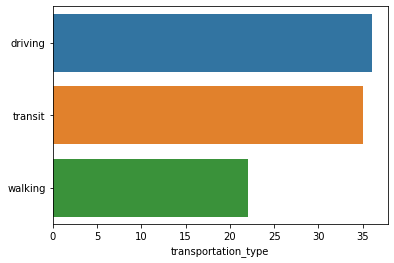

In [140]:
sns.barplot(data = France, x = France['transportation_type'].value_counts(), y = France['transportation_type'].unique())

In [ ]:
df = mobility_data[(mobility_data['region'] == region_name) &
                       (mobility_data['transportation_type'] == transportation)]

    df = df.drop(['geo_type', 'alternative_name'], axis=1)
    df_t = df.melt(['region', 'transportation_type'], var_name='Date', value_name='Value')
    df_t.Date = pandas.to_datetime(df_t.Date, format='%Y-%m-%d')
    df_t.set_index('Date', inplace=True)
    df_t.Value = df_t.Value - df_t.Value.iloc[0]
    df_t.Value = df_t.Value.round(2)